## House Pricing Assignment
<h3>Purpose</h3>
<p>A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. <p>
    
<h4>Goal</h4>
Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house

### Agenda for House pricing Assignment
1. Read and understand the data
2. Clean the data for extra variables
3. Visualize the data with different variables
4. Handling Skew data and dummy variables
5. Split the data to Test and Train data
6. Feature selection Techniques
7. Build a linear model
8. Ridge and Lasso Regression
9. Evaluate the Model Data
9. Model Assesment and comparision

In [3008]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV, KFold

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)


# Step 1: Read and Understand the data

In [3009]:
df = pd.read_csv("train.csv")
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3010]:
# describe the data and check the mean values
df.describe().T

## Observation
#WE can see the min column has different values, this shows the data is not consistent across the columns


,count,mean,std,min,25%,50%,75%,max
Id,1.5e+03,7.3e+02,4.2e+02,1,3.7e+02,7.3e+02,1.1e+03,1.5e+03
MSSubClass,1.5e+03,57,42,20,20,50,70,1.9e+02
LotFrontage,1.2e+03,70,24,21,59,69,80,3.1e+02
LotArea,1.5e+03,1.1e+04,1e+04,1.3e+03,7.6e+03,9.5e+03,1.2e+04,2.2e+05
OverallQual,1.5e+03,6.1,1.4,1,5,6,7,10
OverallCond,1.5e+03,5.6,1.1,1,5,5,6,9
YearBuilt,1.5e+03,2e+03,30,1.9e+03,2e+03,2e+03,2e+03,2e+03
YearRemodAdd,1.5e+03,2e+03,21,2e+03,2e+03,2e+03,2e+03,2e+03
MasVnrArea,1.5e+03,1e+02,1.8e+02,0,0,0,1.7e+02,1.6e+03
BsmtFinSF1,1.5e+03,4.4e+02,4.6e+02,0,0,3.8e+02,7.1e+02,5.6e+03


In [3011]:
# lets check the type of all the columns
df.info()
df_copy = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3012]:
## lets check for any null values
df_null = round(df.isna().sum()/df.shape[0]*100,2)
df_null.sort_values(axis=0,ascending=False).head(10)

## Observation
## we could see few columns with more than 50% null values, lets proceed and clean the data and check for outliers

PoolQC         1e+02
MiscFeature       96
Alley             94
Fence             81
FireplaceQu       47
LotFrontage       18
GarageYrBlt      5.5
GarageCond       5.5
GarageType       5.5
GarageFinish     5.5
dtype: float64

## Step 2 Data cleaning

In [3013]:
# let print all the columns having null values
print("Columns having containing null values:", df.columns[100*df.isnull().mean() != 0].tolist())

Columns having containing null values: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [3014]:
# lets clean the data will null perecentage > 50%

dropcols = df_null[df_null>50].index
df.drop(dropcols, axis = 1, inplace = True)


In [3015]:
## lets check for any null values after cleaning
df_null = round(df.isna().sum()/df.shape[0]*100,2)
print("Shape after removing null columns",df.shape)
df_null.sort_values(axis=0,ascending=False).head(20)

Shape after removing null columns (1460, 77)


FireplaceQu      47
LotFrontage      18
GarageType      5.5
GarageYrBlt     5.5
GarageFinish    5.5
GarageQual      5.5
GarageCond      5.5
BsmtExposure    2.6
BsmtFinType2    2.6
BsmtQual        2.5
BsmtCond        2.5
BsmtFinType1    2.5
MasVnrArea     0.55
MasVnrType     0.55
Electrical     0.07
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
dtype: float64

In [3016]:
## lets Remove any columns of object type with more than 80% unique values

def removeUniqueValuesForObjectType(data, prcnt):
    df1= data.copy()
    my_list= []
    cat_obj_cols = df1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
objColumnsToDrop = removeUniqueValuesForObjectType(data=df, prcnt=80)  
print("Categorical object type columns removed:",objColumnsToDrop)
print("\nNumber of categorical object type columns removed: ", len(objColumnsToDrop),"\n")


Categorical object type columns removed: ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Number of categorical object type columns removed:  20 



In [3017]:
#lets drop all the above columns which more than 80 % unique values, as this might not help in preditcing a good model
print("shape Before dropping ", df.shape)
df = df.drop(objColumnsToDrop, axis=1)
print("shape After dropping ", df.shape)

shape Before dropping  (1460, 77)
shape After dropping  (1460, 57)


In [3018]:
## lets Remove any columns of numerical type with more than 80% unique values

def removeUniqueValuesForNumericType(data, prcnt):
    df1= data.copy()
    my_list= []
    num_cols = df1.select_dtypes(include=['int64','float64','int32','float32'])
    for col in (num_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
numColumnsToDrop = removeUniqueValuesForNumericType(data=df, prcnt=80)  
print("Numeric columns removed:",numColumnsToDrop)
print("\nNumber of numeric columns removed: ", len(numColumnsToDrop),"\n")



Numeric columns removed: ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

Number of numeric columns removed:  9 



In [3019]:
#lets drop the numeric columns with more than 80% unqiue values
print("shape Before dropping ", df.shape)
df = df.drop(numColumnsToDrop, axis=1)
print("shape After dropping ", df.shape)

shape Before dropping  (1460, 57)
shape After dropping  (1460, 48)


In [3020]:
# Removing identity column as they do not contribute to the analysis
df.drop(['Id'],axis = 1, inplace=True) 

## Data imputation

In [3021]:
# We need to identify the numeric and categoric columns 
numcols = df.columns[df.dtypes!='O'].tolist()
objcols = df.columns[df.dtypes=='O'].tolist()

#### numeric data imputation

In [3022]:
# lets check the null values in numerical columns and impute the data

missing_counts = df[numcols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [3023]:
# We have diff ways to impute the data, we go with basic one to impute with the average value of the columns
# lets first see the percentiles for above columns
print("LotFrontage Stats:\n",df.LotFrontage.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))
print("\nGarageYrBlt Stats:\n",df.GarageYrBlt.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))
print("\nMasVnrArea Stats:\n",df.MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))

LotFrontage Stats:
 count   1.2e+03
mean         70
std          24
min          21
10%          44
25%          59
50%          69
75%          80
85%          90
90%          96
95%     1.1e+02
98%     1.2e+02
99%     1.4e+02
100%    3.1e+02
max     3.1e+02
Name: LotFrontage, dtype: float64

GarageYrBlt Stats:
 count   1.4e+03
mean      2e+03
std          25
min     1.9e+03
10%     1.9e+03
25%       2e+03
50%       2e+03
75%       2e+03
85%       2e+03
90%       2e+03
95%       2e+03
98%       2e+03
99%       2e+03
100%      2e+03
max       2e+03
Name: GarageYrBlt, dtype: float64

MasVnrArea Stats:
 count   1.5e+03
mean      1e+02
std     1.8e+02
min           0
10%           0
25%           0
50%           0
75%     1.7e+02
85%     2.6e+02
90%     3.4e+02
95%     4.6e+02
98%     6.5e+02
99%     7.9e+02
100%    1.6e+03
max     1.6e+03
Name: MasVnrArea, dtype: float64


In [3024]:
## if we observe column 'MasVnrArea' has zero at 50% which will not help in prediction
##For 'MasVnrArea', let remove all the values at 0.0 percentile to get a more precise value.
updated_MasVnrArea = df.MasVnrArea[~(df.MasVnrArea==0)]
print("\nMasVnrArea Stats:\n",updated_MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))


MasVnrArea Stats:
 count   5.9e+02
mean    2.5e+02
std     2.1e+02
min           1
10%          70
25%     1.1e+02
50%       2e+02
75%     3.3e+02
85%     4.2e+02
90%     4.8e+02
95%     6.5e+02
98%     8.6e+02
99%       1e+03
100%    1.6e+03
max     1.6e+03
Name: MasVnrArea, dtype: float64


In [3025]:
# lets impute the numerical columns data with the mean values

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan, df['GarageYrBlt'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, updated_MasVnrArea.median())

In [3026]:
# check if the null vallues are handled
numeric_null_cols = df.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

Series([], dtype: float64)

#### Impute object values

In [3027]:

missing_objs = df[objcols].isna().sum().sort_values(ascending=False)
missing_objs[missing_objs > 0]

FireplaceQu     690
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType1     37
BsmtQual         37
MasVnrType        8
dtype: int64

In [3028]:
df[objcols]=df[objcols].fillna(df.mode().iloc[0])

In [3029]:
# check if the object type columns has null values
numeric_null_cols = df.select_dtypes(include=['O'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

Series([], dtype: float64)

In [3030]:
print(df.shape)

(1460, 47)


In [3031]:
# lets remove any extra spaces in column names
df = df.rename(columns= lambda x: x.strip(), inplace=False)


In [3032]:
print("Columns having containing null values:", df.columns[100*df.isnull().mean() != 0].tolist())

Columns having containing null values: []


In [3033]:
df.isnull().values.any()

False

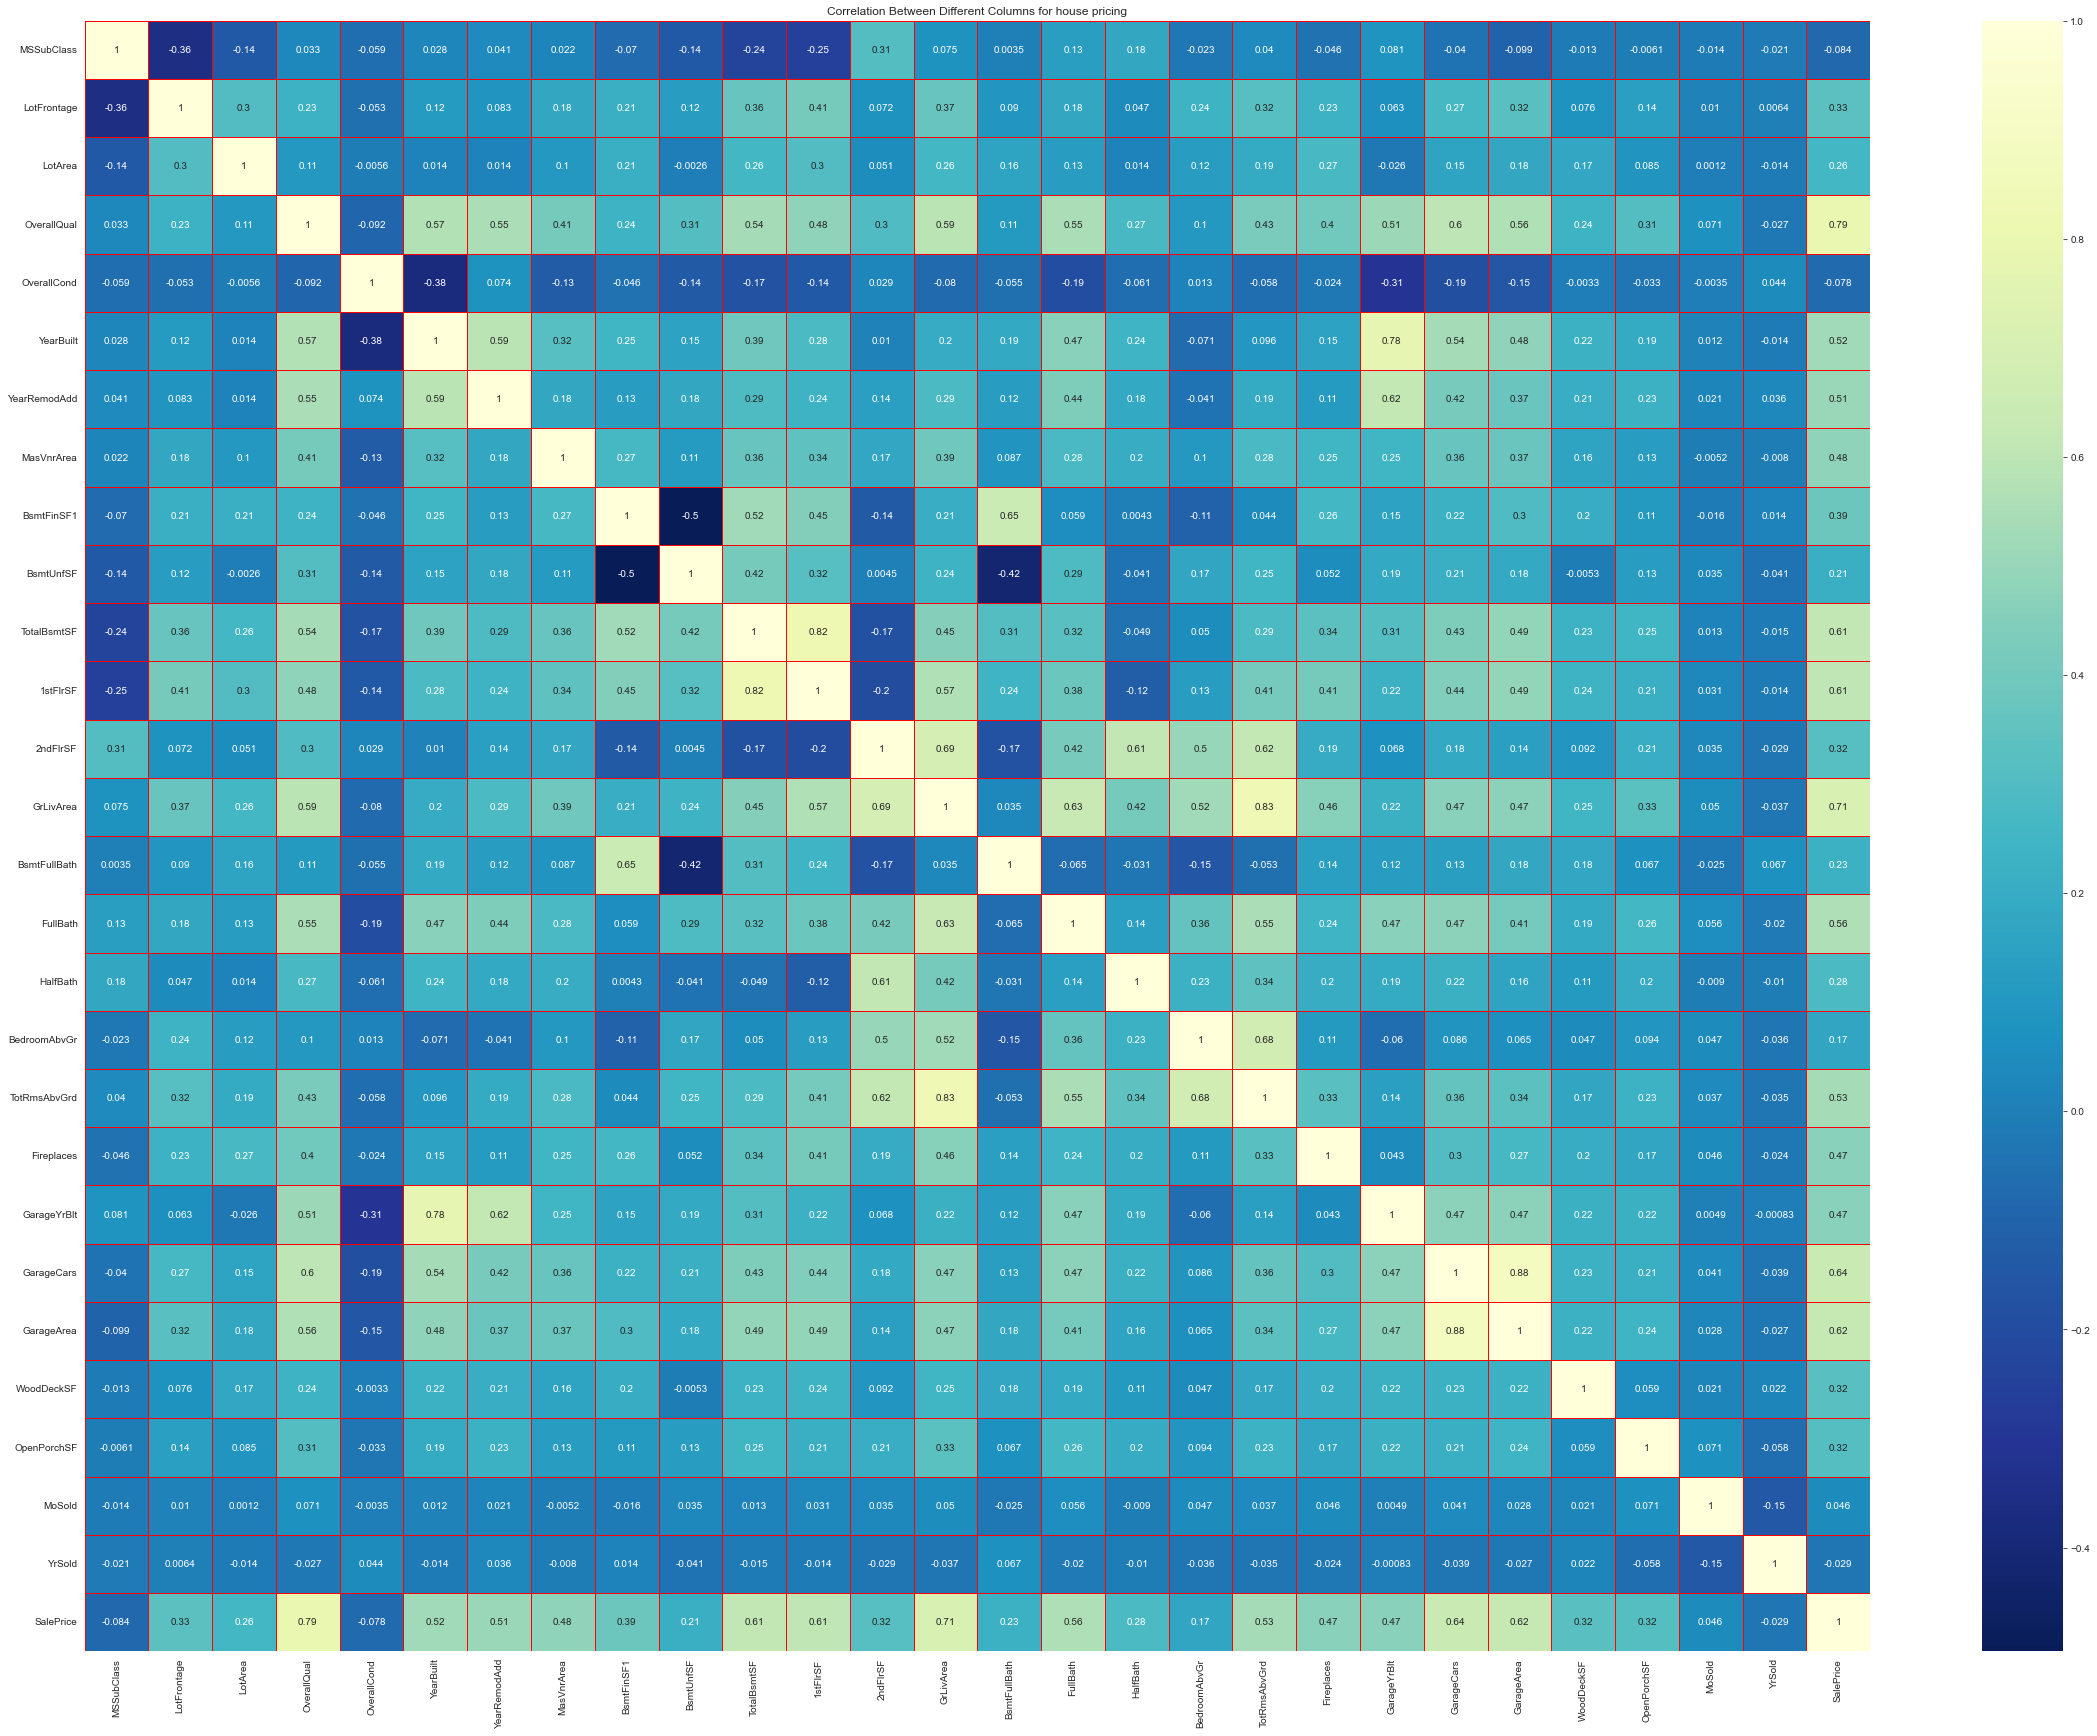

In [3034]:
# Lets first see a correlation mapping to see the over view of the data before handling skewed data
plt.figure(figsize = [40,30])
sns.heatmap(data = df.corr(), annot = True, cmap="YlGnBu_r",linecolor='r',linewidths="1.0")
plt.title('Correlation Between Different Columns for house pricing')
plt.show()


#### observations
- When compared with our target variable 'saleprice', we have decent correlation(0.79)between 'overallqual' and 'saleprice' and 0.71 between 'saleprice' and 'GrLivArea'
- we can see a good correlation between garage cars and garage area
- we can see that there is goo corrleation of 0.83 between GrLivArea vs TotRmsAbvGrd 

In [3035]:
##Check outliers
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1.5e+03,1.5e+03,1.5e+03,1.5e+03,1.5e+03,1.5e+03,1.5e+03,1.5e+03,1.5e+03,1.5e+03,...,1.5e+03,1.5e+03,1.5e+03,1.5e+03,1.5e+03,1.5e+03,1.5e+03,1.5e+03,1.5e+03,1.5e+03
mean,57,70,1.1e+04,6.1,5.6,2e+03,2e+03,1e+02,4.4e+02,5.7e+02,...,6.5,0.61,2e+03,1.8,4.7e+02,94,47,6.3,2e+03,1.8e+05
std,42,22,1e+04,1.4,1.1,30,21,1.8e+02,4.6e+02,4.4e+02,...,1.6,0.64,24,0.75,2.1e+02,1.3e+02,66,2.7,1.3,7.9e+04
min,20,21,1.3e+03,1,1,1.9e+03,2e+03,0,0,0,...,2,0,1.9e+03,0,0,0,0,1,2e+03,3.5e+04
10%,20,49,5e+03,5,5,1.9e+03,2e+03,0,0,75,...,5,0,1.9e+03,1,2.4e+02,0,0,3,2e+03,1.1e+05
25%,20,60,7.6e+03,5,5,2e+03,2e+03,0,0,2.2e+02,...,5,0,2e+03,1,3.3e+02,0,0,5,2e+03,1.3e+05
50%,50,69,9.5e+03,6,5,2e+03,2e+03,0,3.8e+02,4.8e+02,...,6,1,2e+03,2,4.8e+02,0,25,6,2e+03,1.6e+05
75%,70,79,1.2e+04,7,6,2e+03,2e+03,1.7e+02,7.1e+02,8.1e+02,...,7,1,2e+03,2,5.8e+02,1.7e+02,68,8,2e+03,2.1e+05
95%,1.6e+02,1e+02,1.7e+04,8,8,2e+03,2e+03,4.6e+02,1.3e+03,1.5e+03,...,10,2,2e+03,3,8.5e+02,3.4e+02,1.8e+02,11,2e+03,3.3e+05
98%,1.9e+02,1.2e+02,2.5e+04,9,8,2e+03,2e+03,6.5e+02,1.4e+03,1.7e+03,...,11,2,2e+03,3,9.1e+02,4.3e+02,2.4e+02,12,2e+03,3.9e+05


In [3036]:
q_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < q_LotArea]


# Removing values beyond 99% for TotalBsmtSF
q_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < q_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

q_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < q_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

q_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < q_OpenPorchSF]

In [3037]:
retained_data = round(100*(len(df)/df_copy.shape[0]),2)
print(retained_data,"%")

94.93 %


## Creating dummy varibles to prepare data for liner regression

In [3038]:
#lets see the data before creating dummy values
df_before_dummy= df.copy()
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,RL,65,8450,Reg,Inside,CollgCr,2Story,7,5,...,Attchd,2e+03,RFn,2,548,0,61,2,2008,208500
1,20,RL,80,9600,Reg,FR2,Veenker,1Story,6,8,...,Attchd,2e+03,RFn,2,460,298,0,5,2007,181500
2,60,RL,68,11250,IR1,Inside,CollgCr,2Story,7,5,...,Attchd,2e+03,RFn,2,608,0,42,9,2008,223500
3,70,RL,60,9550,IR1,Corner,Crawfor,2Story,7,5,...,Detchd,2e+03,Unf,3,642,0,35,2,2006,140000
4,60,RL,84,14260,IR1,FR2,NoRidge,2Story,8,5,...,Attchd,2e+03,RFn,3,836,192,84,12,2008,250000


In [3039]:
obj = df.columns[df.dtypes=='O'].to_list()
df = pd.get_dummies(data = df, columns=obj, drop_first = True)

In [3040]:
dummycols  = df.describe().T

colwithmaxvalueabove1 = dummycols[dummycols['max']>1].index
colwithmaxvalueabove1

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [3041]:
# Observation
# we can see all the categorical columns are now replaced with dummy values which helps for our modelling
# and also called One Hot Encoding

In [3042]:
##removing those predictor variables that have a high correlation with other predictors.

df_corr = df.drop(['SalePrice'],axis =1)
my_corr_matrix = df_corr.corr().abs()
my_corr_matrix

upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.70)]  #Reduces multicollinearity (if any)
col_to_drop  #columns to drop from df. Independent predictors highly correlated to each other

['1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'RoofStyle_Hip',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_None',
 'ExterQual_TA',
 'Foundation_PConc',
 'BsmtQual_TA',
 'BsmtFinType1_Unf',
 'KitchenQual_TA',
 'FireplaceQu_TA',
 'GarageType_Detchd']

In [3043]:
df = df.drop(col_to_drop, axis=1)


In [3044]:
df.shape

(1386, 118)

In [3045]:
df.head().T

,0,1,2,3,4
MSSubClass,60,20,60,70,60
LotFrontage,65,80,68,60,84
LotArea,8.4e+03,9.6e+03,1.1e+04,9.6e+03,1.4e+04
OverallQual,7,6,7,7,8
OverallCond,5,8,5,5,5
YearBuilt,2e+03,2e+03,2e+03,1.9e+03,2e+03
YearRemodAdd,2e+03,2e+03,2e+03,2e+03,2e+03
MasVnrArea,2e+02,0,1.6e+02,0,3.5e+02
BsmtFinSF1,7.1e+02,9.8e+02,4.9e+02,2.2e+02,6.6e+02
BsmtUnfSF,1.5e+02,2.8e+02,4.3e+02,5.4e+02,4.9e+02


## Step 5 .Split the data to Test and Train data


In [3046]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)
print(df_train.shape)
print(df_train.columns)
df_train.describe().T

(970, 118)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'KitchenQual_Gd', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageFinish_RFn', 'GarageFinish_Unf'],
      dtype='object', length=118)


,count,mean,std,min,25%,50%,75%,max
MSSubClass,9.7e+02,57,42,20,20,50,70,1.9e+02
LotFrontage,9.7e+02,69,19,21,60,69,78,1.8e+02
LotArea,9.7e+02,9.5e+03,3.6e+03,1.5e+03,7.4e+03,9.3e+03,1.1e+04,2.5e+04
OverallQual,9.7e+02,6.1,1.3,1,5,6,7,10
OverallCond,9.7e+02,5.6,1.1,1,5,5,6,9
YearBuilt,9.7e+02,2e+03,30,1.9e+03,2e+03,2e+03,2e+03,2e+03
YearRemodAdd,9.7e+02,2e+03,21,2e+03,2e+03,2e+03,2e+03,2e+03
MasVnrArea,9.7e+02,1e+02,1.7e+02,0,0,0,1.6e+02,1.6e+03
BsmtFinSF1,9.7e+02,4.2e+02,4.2e+02,0,0,3.8e+02,6.9e+02,1.7e+03
BsmtUnfSF,9.7e+02,5.5e+02,4.3e+02,0,2.1e+02,4.6e+02,7.8e+02,2e+03


## this the code use for question 3 of subjective questions
print(df_train.columns)
print(len(df_train.columns))
dropcols=['TotalBsmtSF','OverallQual','2ndFlrSF','YearBuilt','Neighborhood_StoneBr','MasVnrArea']
df_train = df_train.drop(dropcols,axis=1)
print(df_train.columns)
print(len(df_train.columns))

In [3047]:
varcols = df_train.describe().T
fitcols = varcols[varcols['max']>1].index
df[fitcols]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65,8450,7,5,2003,2003,2e+02,706,150,...,2,1,3,0,2,0,61,2,2008,208500
1,20,80,9600,6,8,1976,1976,0,978,284,...,2,0,3,1,2,298,0,5,2007,181500
2,60,68,11250,7,5,2001,2002,1.6e+02,486,434,...,2,1,3,1,2,0,42,9,2008,223500
3,70,60,9550,7,5,1915,1970,0,216,540,...,1,0,3,1,3,0,35,2,2006,140000
4,60,84,14260,8,5,2000,2000,3.5e+02,655,490,...,2,1,4,1,3,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62,7500,7,5,2004,2005,0,410,811,...,2,0,2,0,2,0,113,10,2009,185000
1455,60,62,7917,6,5,1999,2000,0,0,953,...,2,1,3,1,2,0,40,8,2007,175000
1456,20,85,13175,6,6,1978,1988,1.2e+02,790,589,...,2,0,3,2,2,349,0,2,2010,210000
1457,70,66,9042,7,9,1941,2006,0,275,877,...,2,0,4,2,1,0,60,5,2010,266500


In [3048]:
# Scaling features
fitcols = fitcols.drop('SalePrice')
scaler = MinMaxScaler()
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,KitchenQual_Gd,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageFinish_RFn,GarageFinish_Unf
950,20,60,7200,5,8,1950,2002,0,398,317,...,1,0,1,0,0,0,0,0,1,0
1177,50,69,3950,6,8,1926,2004,0,468,350,...,0,0,1,0,0,0,0,0,0,1
566,60,77,11198,9,5,2005,2007,2.4e+02,0,1122,...,0,0,1,0,0,0,1,0,0,0
1037,60,69,9240,8,5,2001,2002,4e+02,0,1055,...,1,0,0,0,0,0,1,0,0,0
516,80,69,10448,6,6,1972,1972,3.3e+02,0,689,...,0,0,0,0,1,0,0,0,1,0


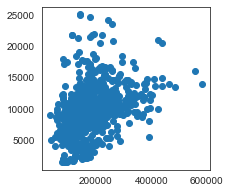

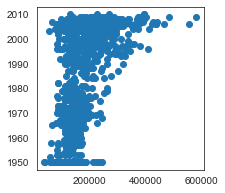

<Figure size 216x216 with 0 Axes>

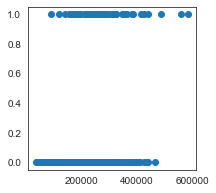

In [3049]:
# lets try plot to see the relation between sales price against other varaibles
plt.figure(figsize=[3,3])
plt.scatter(df_train.SalePrice, df_train.LotArea)

plt.figure(figsize=[3,3])
plt.scatter(df_train.SalePrice, df_train.YearRemodAdd)

plt.figure(figsize=[3,3])
#plt.scatter(df_train.SalePrice, df_train.OverallQual)

plt.figure(figsize=[3,3])
plt.scatter(df_train.SalePrice, df_train.GarageType_BuiltIn)

plt.show()

### observation
From above graphs for we can see a good linear reression betwween sales price and Lotarea where as no relation for overall qual and garage type

## 6. Feature selection Techniques

In [3050]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

# lets use the fit_transform on the train data
X_train[fitcols] = scaler.fit_transform(X_train[fitcols])

# lets perfome transform on the test data
X_test[fitcols] = scaler.transform(X_test[fitcols])

print(X_train.shape)
print(X_test.shape)

(970, 117)
(416, 117)


#Feature Selection is the method of reducing the input variable to your model by using only
#relevant data and getting rid of noise in data

#We are going to use two techniques for this

### 1. RFE ( Recursive Feature Elimination)


In [3051]:
dftrain = pd.DataFrame(X_train)
dftrain.dtypes

MSSubClass              float64
LotFrontage             float64
LotArea                 float64
OverallQual             float64
OverallCond             float64
YearBuilt               float64
YearRemodAdd            float64
MasVnrArea              float64
BsmtFinSF1              float64
BsmtUnfSF               float64
TotalBsmtSF             float64
2ndFlrSF                float64
BsmtFullBath            float64
FullBath                float64
HalfBath                float64
BedroomAbvGr            float64
Fireplaces              float64
GarageCars              float64
WoodDeckSF              float64
OpenPorchSF             float64
MoSold                  float64
YrSold                  float64
MSZoning_FV               uint8
MSZoning_RH               uint8
MSZoning_RL               uint8
LotShape_IR2              uint8
LotShape_IR3              uint8
LotShape_Reg              uint8
LotConfig_CulDSac         uint8
LotConfig_FR2             uint8
LotConfig_FR3             uint8
LotConfi

In [3052]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=30)             # running RFE
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [3053]:
# Lets select the top variables to participat ein modelling
# ref.support_ returns an array with boolean values to indicate whether an attribute was selected using RFE
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('MSSubClass', True, 1),
 ('LotFrontage', False, 5),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 61),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('BsmtFullBath', False, 29),
 ('FullBath', True, 1),
 ('HalfBath', False, 31),
 ('BedroomAbvGr', True, 1),
 ('Fireplaces', False, 33),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 17),
 ('OpenPorchSF', False, 18),
 ('MoSold', False, 78),
 ('YrSold', False, 51),
 ('MSZoning_FV', False, 45),
 ('MSZoning_RH', False, 40),
 ('MSZoning_RL', False, 41),
 ('LotShape_IR2', False, 47),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 66),
 ('LotConfig_CulDSac', False, 65),
 ('LotConfig_FR2', False, 34),
 ('LotConfig_FR3', False, 28),
 ('LotConfig_Inside', False, 76),
 ('Neighborhood_Blueste', False, 70),
 ('Neighborhood_BrDale', True, 1),
 ('Neighborhood_BrkSide', False, 46),
 (

In [3054]:
# let see the selected variable via RFE in col list
X_train.columns[rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF',
       'FullBath', 'BedroomAbvGr', 'GarageCars', 'LotShape_IR3',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Mitchel', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'Foundation_Slab', 'Foundation_Wood', 'BsmtQual_Gd', 'BsmtExposure_Gd'],
      dtype='object')

In [3055]:
# lets prpeare the rfe data
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [3056]:
# lets prepare test data from the selected rfe columns
X_test_new = X_test[X_train_rfe.columns]


In [3057]:
# let try to performliner regression on the test and train data
lm.fit(X_train_rfe,y_train)

LinearRegression()

In [3058]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-64812.2678212506
[-23481.645187    48099.60040121 112469.72967961  23753.22651572
  55608.46333612  20529.29616029  36035.99456632  33534.27066956
 119274.41414795 102581.55912391  17698.67754404 -25816.18582028
  38064.76727287 -20666.01080219 -16887.55214454 -13532.3997366
  33702.99517416 -16931.38624962  34397.75179329  48785.11977461
  15659.02225578  58420.85260788 -59625.92252796  22438.19053607
 -28004.21295921  28893.55965835  36011.12933904 -28632.36870039
 -14244.45090448  22108.95904097]


In [3059]:
print(X_train_rfe.shape)
print(X_test_new.shape)

(970, 30)
(416, 30)


In [3060]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score on training data', r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score on test data', r2_test_lr)

#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints

rss2 = np.sum(np.square(y_test - y_pred_test))
print('RSS score', rss2)

mse = mean_squared_error(y_test, y_pred_test)
print('mse test', mse)

# Root Mean Squared Error
rmse = mse**0.5
print("Root mean square ::",rmse)

R2 score on training data 0.8809710789697826
R2 score on test data 0.8624723914952057
RSS score 278566825628.7782
mse test 669631792.3768706
Root mean square :: 25877.244682865112


## observation
- we can see the r2 score on the train data is 88% and on the test data is 86% seems to be a good fit


## Model Building: Lasso Regression Model



## lets try the lasso regression first

In [3061]:
##Lasso Regression Model Building
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [ 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [3062]:
##ReDisplay the mean scores

cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,100,-1.5e+04,-1.7e+04,1
22,50,-1.5e+04,-1.7e+04,2
21,20,-1.5e+04,-1.7e+04,3
20,10,-1.5e+04,-1.8e+04,4
19,9,-1.5e+04,-1.8e+04,5
18,8,-1.5e+04,-1.8e+04,6
17,7,-1.5e+04,-1.8e+04,7
16,6,-1.5e+04,-1.8e+04,8
15,5,-1.5e+04,-1.8e+04,9
14,4,-1.5e+04,-1.8e+04,10


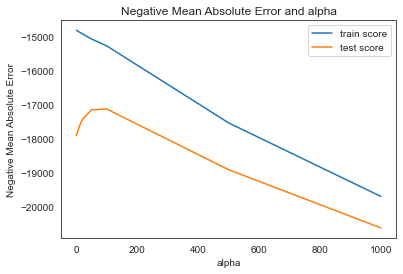

In [3063]:

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [3064]:
# lets check the best alpha param taht can be used
print(lasso_model_cv.best_params_)

{'alpha': 100}


In [3065]:
alpha = 1.0
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print("Intercepts: ",lasso.intercept_)
print("Coefficients:\n",lasso.coef_)

Intercepts:  -28239.683041978366
Coefficients:
 [-2.78258975e+04  2.46621617e+04  3.87605897e+04  8.44055683e+04
  3.52605343e+04  4.92918689e+04  1.43289658e+04  3.13607349e+04
  1.95129284e+04 -1.01979811e+03  1.07303724e+05  8.34546927e+04
  7.80471473e+03  2.59403018e+04  1.18912069e+04 -1.74671197e+04
  8.84117214e+03  3.75718750e+04  1.04622709e+04  1.21283630e+04
 -1.20172006e+03 -4.75970444e+03  9.23141090e+03  6.29034499e+03
  8.34854981e+03  4.95458218e+03 -1.89313129e+04  2.67910087e+03
  4.29133672e+03 -7.85343278e+03 -1.24302660e+04  1.48545034e+03
  1.56336891e+03 -2.61491963e+03  6.13845237e+03 -2.91486514e+04
 -7.52349537e+03  2.32453774e+04 -1.69745631e+04 -2.28715085e+04
 -6.79250438e+03 -7.73474875e+03 -2.73361883e+04 -1.74699933e+04
 -2.18855835e+03 -1.97808654e+04  1.35198819e+04  2.28744544e+04
 -1.15110888e+04 -9.61926081e+03 -1.56126166e+04 -6.56077283e+03
  3.89859422e+04 -1.12927891e+04  5.93755781e+03 -9.63555351e+02
  3.07632007e+03  2.61207979e+03  1.749235

In [3066]:
y_pred_l = lasso.predict(X_test)
residual = y_test - y_pred_l


In [3067]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score on training data', r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score on test data', r2_test_lr)

#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints

rss2 = np.sum(np.square(y_test - y_pred_test))
print('RSS score', rss2)

mse = mean_squared_error(y_test, y_pred_test)
print('mse test', mse)

# Root Mean Squared Error
rmse = mse**0.5
print("Root mean square ::",rmse)

R2 score on training data 0.9113223141008435
R2 score on test data 0.8779433801196493
RSS score 247229814556.56168
mse test 594302438.8378886
Root mean square :: 24378.31903224438


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

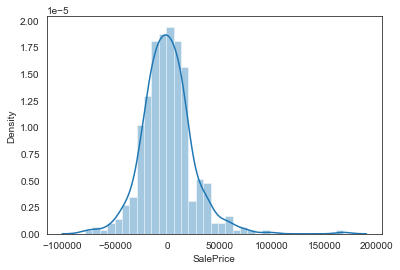

In [3068]:
sns.distplot(residual)

In [3069]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(5)

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,TotalBsmtSF,1.1e+05,1.1e+05
1,OverallQual,8.4e+04,8.4e+04
2,2ndFlrSF,8.3e+04,8.3e+04
3,Exterior1st_BrkComm,-6.5e+04,6.5e+04
4,Exterior1st_AsphShn,5e+04,5e+04


In [3070]:
 #check the coefficient values with (lambda) alpha = 0.5

lasso = Lasso(alpha=10)
        
lasso.fit(X_train, y_train) 
print("Intercepts: ",lasso.intercept_)
print("Coefficients:\n",lasso.coef_)

Intercepts:  -32747.540364143293
Coefficients:
 [-2.70296845e+04  2.30110524e+04  3.88121906e+04  8.57670719e+04
  3.38197493e+04  4.89353545e+04  1.45276326e+04  3.10178912e+04
  1.98579018e+04 -0.00000000e+00  1.04756830e+05  8.14671120e+04
  7.76542067e+03  2.62809868e+04  1.24447501e+04 -1.57470632e+04
  9.44729885e+03  3.80778487e+04  1.05997817e+04  1.15560231e+04
 -1.27324809e+03 -4.63489458e+03  1.11296357e+04  5.38625587e+03
  8.24965465e+03  5.03222354e+03 -1.73331812e+04  2.66715307e+03
  4.33402220e+03 -7.56420219e+03 -8.56715280e+03  1.35693129e+03
  0.00000000e+00 -0.00000000e+00  9.50806936e+03 -2.35292361e+04
 -4.81220779e+03  2.63450968e+04 -1.31746258e+04 -2.03236250e+04
 -3.23617667e+03 -3.49076135e+03 -2.38584623e+04 -1.37268653e+04
  3.12377969e+03 -1.65940941e+04  1.53356379e+04  2.50374497e+04
 -7.88007310e+03 -5.19253867e+03 -1.21878352e+04 -3.53203221e+03
  4.03900201e+04 -8.36185090e+03  7.32988248e+03 -1.02975694e+03
  4.04133897e+02  1.00758274e+03  8.254445

In [3071]:
y_pred_l = lasso.predict(X_test)
residual = y_test - y_pred_l

In [3072]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score on training data', r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score on test data', r2_test_lr)

#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints

rss2 = np.sum(np.square(y_test - y_pred_test))
print('RSS score', rss2)

mse = mean_squared_error(y_test, y_pred_test)
print('mse test', mse)

# Root Mean Squared Error
rmse = mse**0.5
print("Root mean square ::",rmse)

R2 score on training data 0.9109392056466651
R2 score on test data 0.880342822679755
RSS score 242369662442.27606
mse test 582619380.8708559
Root mean square :: 24137.509831605577


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

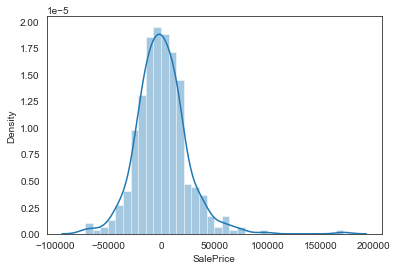

In [3073]:
sns.distplot(residual)

In [3074]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(5)

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,TotalBsmtSF,1e+05,1e+05
1,OverallQual,8.6e+04,8.6e+04
2,2ndFlrSF,8.1e+04,8.1e+04
3,YearBuilt,4.9e+04,4.9e+04
4,Exterior1st_BrkComm,-4.7e+04,4.7e+04


In [3075]:
 #check the coefficient values with (lambda) alpha = 0.5

lasso = Lasso(alpha=20)
        
lasso.fit(X_train, y_train) 
print("Intercepts: ",lasso.intercept_)
print("Coefficients:\n",lasso.coef_)

Intercepts:  -35585.26628187383
Coefficients:
 [-26099.35787315  21391.78203357  38527.34450821  87319.18652113
  32635.52733295  48405.01469611  14581.1494971   30896.05673064
  19862.98892552      0.         102919.78923539  79275.27686781
   7372.33382839  26435.85725507  12897.55622553 -14058.09880391
   9980.23855135  38445.2446683   10600.09929209  11146.71299417
  -1198.41080283  -4548.71694573  12393.34267988   3943.21313211
   8052.47234001   4986.16160879 -15489.54213278   2634.79130638
   4334.84546804  -7299.81000077  -3970.03567373   1250.59842731
      0.              0.          11749.73865598 -18004.49700774
  -2510.12784696  29000.06582964  -9942.32224753 -18084.27449228
   -355.40516112     -0.         -21027.23040987 -10602.9153961
   2773.08047175 -13760.07610615  17029.92836568  26786.05777453
  -4971.1713182   -1543.59875169  -9328.72264786   -971.36694716
  41429.77119887  -5733.08727592   8070.78986875   -168.4793691
      0.              0.              0.     

In [3076]:
y_pred_l = lasso.predict(X_test)
residual = y_test - y_pred_l

In [3077]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score on training data', r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score on test data', r2_test_lr)

#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints

rss2 = np.sum(np.square(y_test - y_pred_test))
print('RSS score', rss2)

mse = mean_squared_error(y_test, y_pred_test)
print('mse test', mse)

# Root Mean Squared Error
rmse = mse**0.5
print("Root mean square ::",rmse)

R2 score on training data 0.9102202107776705
R2 score on test data 0.8822216719704459
RSS score 238563989614.59525
mse test 573471128.8812386
Root mean square :: 23947.25723086547


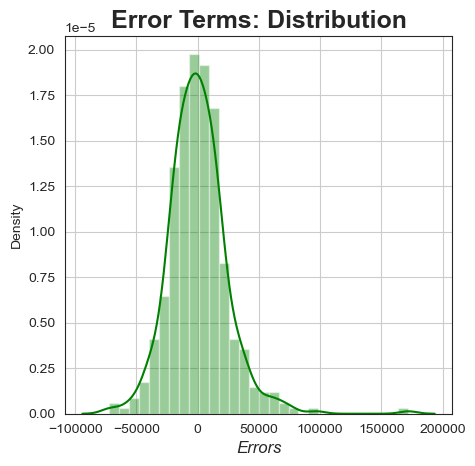

In [3078]:
#sns.distplot(residual)

sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_l)     #residuals
sns.distplot(residual , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

In [3079]:
## error terms seems to be normal with mean 0, so we can go with asumption with aplha value 10`

In [3080]:
##Creating a dataframe of features and coefficients


lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(5)  #New Top5 features display (Lasso Model: Reiterated)

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,TotalBsmtSF,1e+05,1e+05
1,OverallQual,8.7e+04,8.7e+04
2,2ndFlrSF,7.9e+04,7.9e+04
3,YearBuilt,4.8e+04,4.8e+04
4,Neighborhood_StoneBr,4.1e+04,4.1e+04


## Observation for Lasso
- After applying lasso regression using the best alpha param 100, these are the final 5 variables used for prediction are above

# Ridge Regression

In [3081]:
# Import libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [3082]:
print(ridge_model_cv.best_params_)

{'alpha': 1.0}


## lets write a common method which accepts different alpha values and observe the rss, r2 score and coeeficients

In [3083]:
from sklearn.linear_model import Ridge
def ridge_regression(data, alpha, models_to_plot={}):
    #Fit the model
    ridge = Ridge(alpha=alpha,normalize=True)
    ridge.fit(X_train_rfe, y_train)
    y_pred_train_r = ridge.predict(X_train_rfe)
    y_pred_test_r = ridge.predict(X_test_new)
    
    
    #Return the result in pre-defined format

    r2_test = r2_score(y_test, y_pred_test_r)
    r2_train = r2_score(y_train, y_pred_train_r)

    rss = np.sum(np.square(y_test - y_pred_test_r))/10000000000
    ret = [rss,r2_train,r2_test]
    ret.extend([ridge.intercept_])
    ret.extend(ridge.coef_)
    return ret

In [3084]:

#Set the different values of alpha to be tested
alpha_ridge = [0.1,0.2, 0.3, 0.4, 0.5, 1, 2, 5, 8, 9, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','r2_train','r_test','intercept'] + ['coef_x_%d'%i for i in range(1,31)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,12)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)


for i in range(12):
    coef_matrix_ridge.iloc[i,] = ridge_regression(df,alpha_ridge[i])

In [3085]:
# lets print the final table
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,r2_train,r_test,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,...,coef_x_21,coef_x_22,coef_x_23,coef_x_24,coef_x_25,coef_x_26,coef_x_27,coef_x_28,coef_x_29,coef_x_30
alpha_0.1,28,0.88,0.86,-5.5e+04,-2.1e+04,5e+04,1.1e+05,1.6e+04,4.3e+04,2.2e+04,...,2.2e+04,3.5e+04,-5.3e+04,2.3e+04,-2.4e+04,1.7e+04,1.9e+04,-2.7e+04,-1.1e+04,2.1e+04
alpha_0.2,29,0.87,0.86,-4.8e+04,-1.8e+04,5e+04,1.1e+05,1.3e+04,3.8e+04,2.3e+04,...,2.4e+04,2.4e+04,-4.9e+04,2.2e+04,-1.8e+04,1.1e+04,1.2e+04,-2.5e+04,-8.4e+03,2e+04
alpha_0.3,30,0.86,0.85,-4.2e+04,-1.6e+04,4.9e+04,1.1e+05,1.1e+04,3.6e+04,2.2e+04,...,2.4e+04,1.7e+04,-4.6e+04,2.1e+04,-1.3e+04,6.9e+03,7.4e+03,-2.3e+04,-6.7e+03,1.9e+04
alpha_0.4,31,0.86,0.85,-3.6e+04,-1.5e+04,4.8e+04,1e+05,9.5e+03,3.4e+04,2.2e+04,...,2.5e+04,1.2e+04,-4.3e+04,2e+04,-9.3e+03,4.2e+03,4.5e+03,-2.2e+04,-5.4e+03,1.8e+04
alpha_0.5,33,0.85,0.84,-3.1e+04,-1.4e+04,4.7e+04,9.9e+04,8.4e+03,3.3e+04,2.2e+04,...,2.4e+04,8.7e+03,-4.1e+04,1.9e+04,-5.9e+03,2.2e+03,2.4e+03,-2e+04,-4.3e+03,1.7e+04
alpha_1,39,0.82,0.81,-8.8e+03,-1e+04,4.2e+04,8.5e+04,4.3e+03,3e+04,2e+04,...,2.2e+04,-64,-3.4e+04,1.4e+04,4.4e+03,-3.2e+03,-2.9e+03,-1.5e+04,-1.1e+03,1.5e+04
alpha_2,52,0.74,0.74,2.3e+04,-7e+03,3.4e+04,6.7e+04,4.1e+02,2.6e+04,1.7e+04,...,1.7e+04,-5e+03,-2.5e+04,9.4e+03,1.1e+04,-6.4e+03,-5.6e+03,-1e+04,1.3e+03,1.2e+04
alpha_5,85,0.58,0.58,7.5e+04,-3.7e+03,2.1e+04,4.3e+04,-2.4e+03,1.9e+04,1.2e+04,...,1.1e+04,-6e+03,-1.5e+04,4.4e+03,1.2e+04,-6.7e+03,-5.6e+03,-4.8e+03,2.4e+03,7.4e+03
alpha_8,1.1e+02,0.46,0.47,1e+05,-2.5e+03,1.6e+04,3.2e+04,-2.6e+03,1.5e+04,8.9e+03,...,7.7e+03,-5.1e+03,-1.1e+04,2.7e+03,9.8e+03,-5.7e+03,-4.6e+03,-3.1e+03,2.2e+03,5.5e+03
alpha_9,1.1e+02,0.44,0.44,1.1e+05,-2.3e+03,1.4e+04,3e+04,-2.5e+03,1.4e+04,8.2e+03,...,7e+03,-4.9e+03,-9.8e+03,2.4e+03,9.3e+03,-5.4e+03,-4.4e+03,-2.7e+03,2.1e+03,5.1e+03


## Observation
- The RSS(values divided by a number just to display in readable format) increased with an increase in alpha, thus model complexity reduces
- The R2 score decreases with an increase in alpha, which makes the model underfit
- An alpha as small as 0.1 gives us significant reduction in magnitude of coefficients. How? Compare the coefficients in the first row of this table to the last row of simple linear regression table.
- High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1
- Though the coefficients are very very small, they are NOT zero.

In [3086]:
alpha = 1
ridge = Ridge(alpha=alpha,normalize=True)
ridge.fit(X_train, y_train)
print("Intercepts: ",ridge.intercept_)
print("Coefficients:\n",ridge.coef_)


Intercepts:  35712.63996583613
Coefficients:
 [-8.19043202e+03  2.89965603e+04  2.88053779e+04  5.83825154e+04
  9.62989916e+03  1.50297900e+04  1.13484697e+04  3.99415068e+04
  1.82262831e+04  8.64978963e+03  3.86833949e+04  2.19402663e+04
  7.71437610e+03  2.72549278e+04  1.43895114e+04  1.20078242e+04
  2.09398312e+04  3.27570420e+04  1.06247678e+04  1.51069702e+04
  1.39062483e+03 -2.24384896e+03  4.69683343e+03 -9.63983093e+02
  3.91546366e+03  6.79570129e+03 -1.22833841e+04 -7.39836289e+02
  4.47651331e+03 -4.95545286e+03 -6.32015697e+03  8.75872879e+02
  2.72811464e+03 -5.87698073e+03  2.30264332e+03  1.08702199e+03
 -1.13552336e+03  1.95817860e+04 -7.68464572e+03 -8.49914584e+03
 -6.51232775e+03 -1.28657384e+04 -8.53385282e+03 -4.48415976e+03
 -9.15357386e+02 -3.68004890e+03  1.61530992e+04  2.31552895e+04
 -4.89845985e+03 -3.26385276e+03 -5.73515990e+03 -1.25398730e+03
  2.63797080e+04  2.84434915e+03  1.15349223e+04 -3.68062129e+03
  5.55544640e+03  9.11777585e+02 -6.14986029

In [3087]:
y_pred_l = ridge.predict(X_test)
residual = y_test - y_pred_l

### Residual analysis for ridge

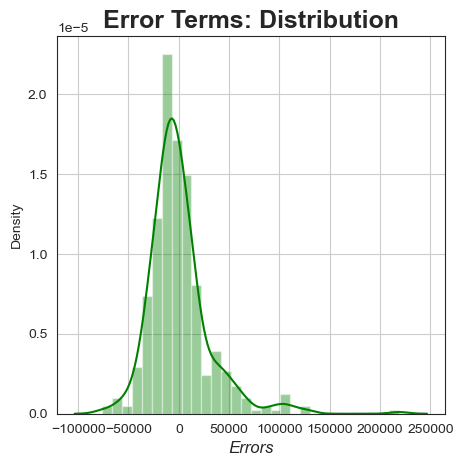

In [3088]:
# For test data

# Plot the histogram of the error terms (test set)
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

## Predicting features when alpha is 1

In [3089]:
##Creating a dataframe of features and coefficients
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(8), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(ridge.coef_.round(8))})
##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#lasso df
ridge_df.head(5)  #N

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,OverallQual,5.8e+04,5.8e+04
1,MasVnrArea,4e+04,4e+04
2,TotalBsmtSF,3.9e+04,3.9e+04
3,GarageCars,3.3e+04,3.3e+04
4,LotFrontage,2.9e+04,2.9e+04
